In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings('ignore')
import sys 
sys.path.append("..")

import numpy as np
from importlib import reload 

import torch
from torch_geometric.loader import DataLoader

from utilities import reader
import test_func as tst
import vis

Random seed set as 1234
Random seed set as 1234


## Load GPU and test dataset

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Running on {}. GPU model : {}".format(device, torch.cuda.get_device_name(0)))

path_dataset = "../../dataset/dConstant"

dataset_train = reader.BuildDataset(root = path_dataset, mode = 'train', precision = torch.float)
dataset_val = reader.BuildDataset(root = path_dataset, mode = 'val', precision = torch.float)
dataset_test = reader.BuildDataset(root = path_dataset, mode = 'test', precision = torch.float)

loader_test = DataLoader(dataset_test,  batch_size = 50, shuffle = False, num_workers = 0)
print("Number of samples in the test dataset : ", len(dataset_test))

Running on cuda. GPU model : Quadro T2000 with Max-Q Design
Number of samples in the test dataset :  2000


Run the following cell to compute the average diameter of the samples in the test dataset

In [3]:
# distance = []
# for k in tqdm(range(len(dataset_test))):

#     data = dataset_test[k]
#     dictpos = {}
#     for i in range(len(data.pos)):
#         dictpos[i] = np.asarray([data.pos[i,0].item(), data.pos[i,1].item()])
    
#     net_data = geonn.utils.to_networkx(data, to_undirected = False, remove_self_loops=False)
#     G = net_data.to_undirected()
#     G.remove_edges_from(nx.selfloop_edges(G))
#     G.remove_nodes_from(list(nx.isolates(G)))
#     d = nx.distance_measures.diameter(G)
#     distance.append(d)
#     dictpos.clear()
    
# print("Mean geodesic distance : ", np.mean(distance))
# print("Max geodesic distance : ", np.max(distance))
# print("Min geodesic distance : ", np.min(distance))

In [4]:
ckpt_psignn = torch.load("../results/constant_dataset/ckpt/running_model.pt")

list_running_train_model = [ckpt_psignn["hist_train"]]
list_running_val_model = [ckpt_psignn["hist_val"]]
list_running_names = ["PsiGNN"]

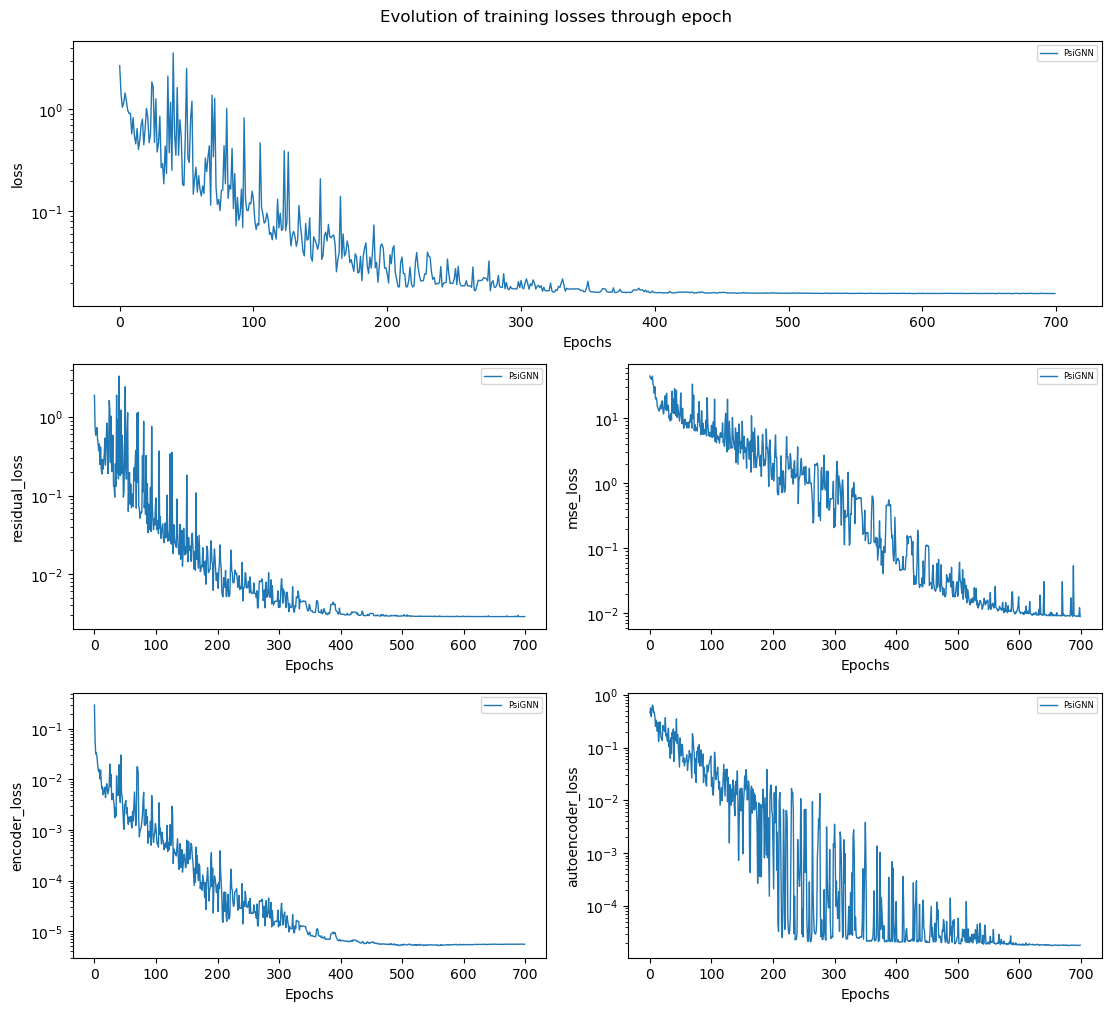

In [5]:
reload(vis)
vis.visualize_losses(list_running_train_model, list_running_names)

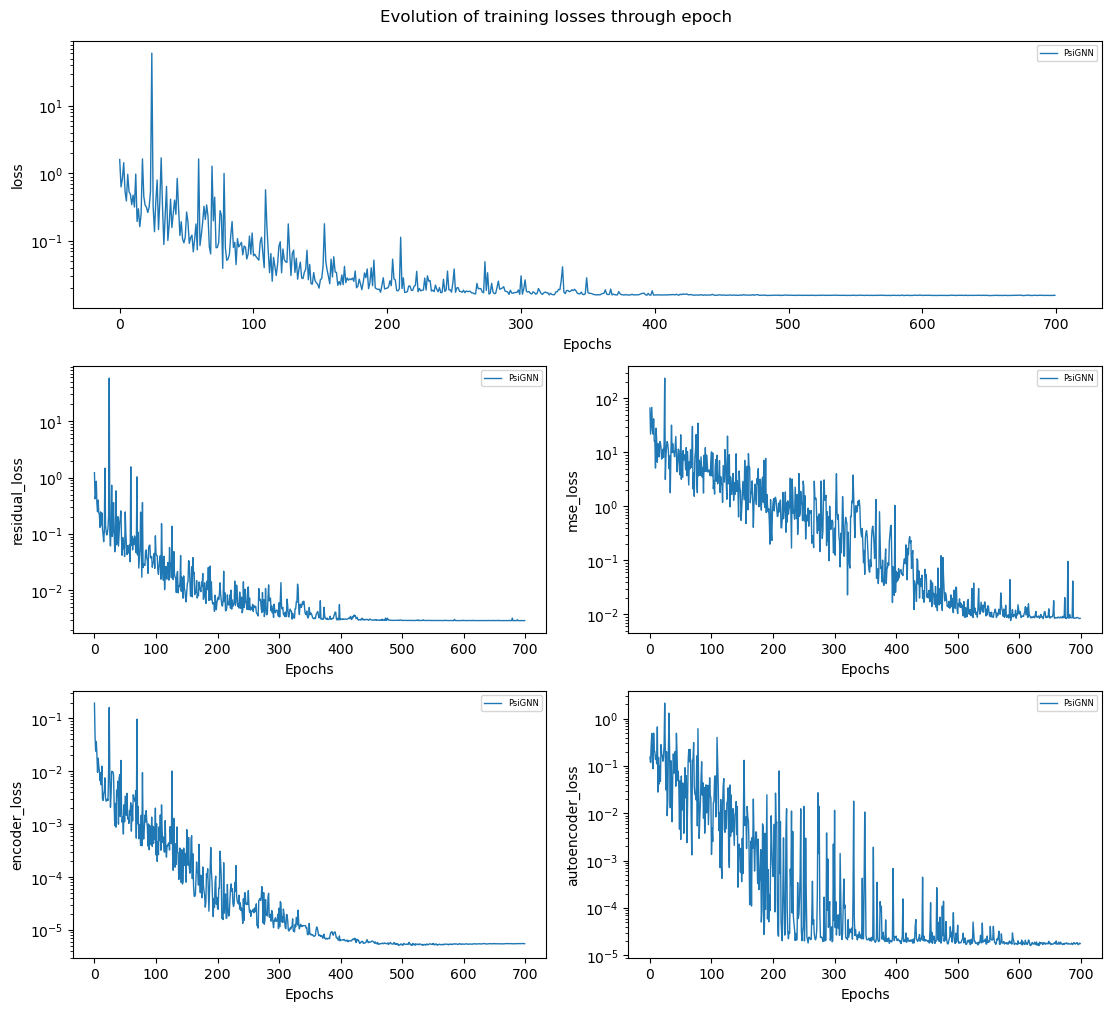

In [6]:
reload(vis)
vis.visualize_losses(list_running_val_model, list_running_names)

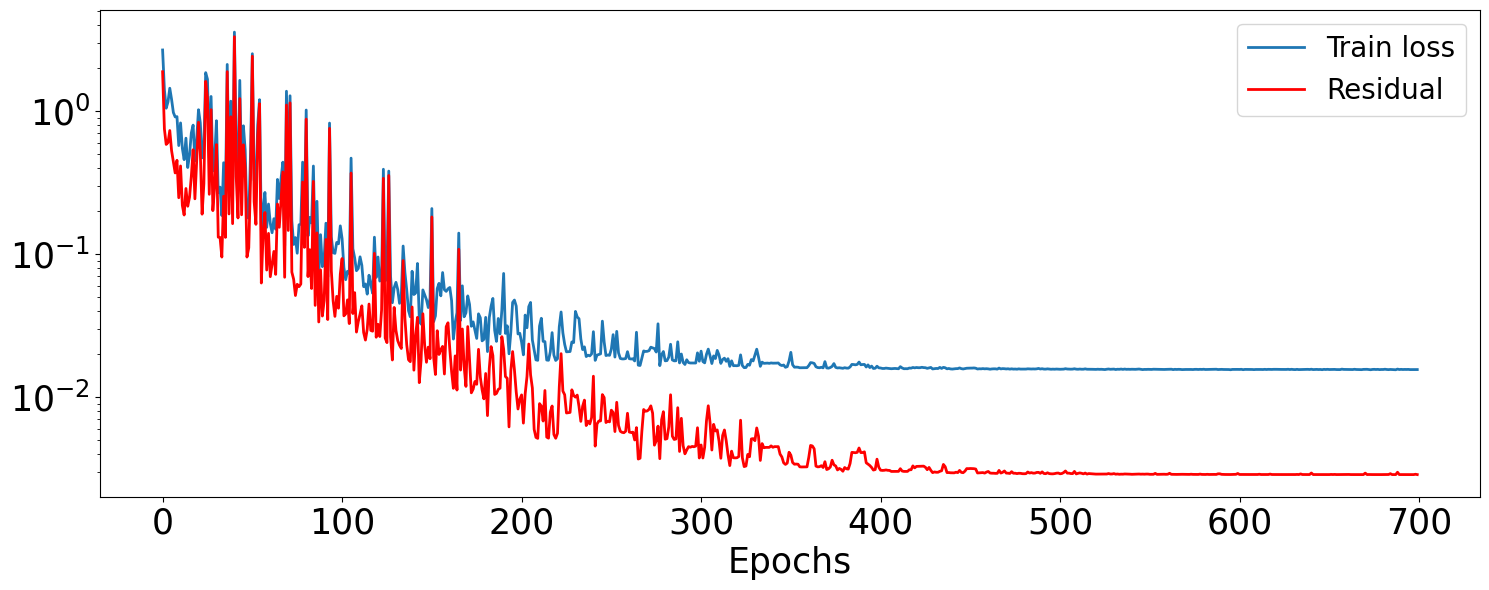

In [7]:
reload(vis)

vis.losses_on_same_plot(ckpt_psignn["hist_train"], "img/")

### Test on the full dataset

In [10]:
reload(tst)

ckpt_best_psignn = torch.load("../results/constant_dataset/ckpt/best_model.pt")

list_best_model = [ckpt_best_psignn]
list_names = ["PsiGNN"]

tst.test_dataset(list_best_model, list_names, loader_test, device)

Random seed set as 1234
Random seed set as 1234
Evaluation model :  PsiGNN
Default config :  {'latent_dim': 10, 'hidden_dim': 10, 'n_layers': 1, 'fw_tol': 1e-05, 'fw_thres': 500, 'bw_tol': 1e-08, 'bw_thres': 500, 'solver': <function broyden at 0x7f565c63f310>, 'path_logs': 'results/30_08_2023_22:26:55/logs'}


100%|██████████| 40/40 [00:39<00:00,  1.02it/s]

std Res :  0.0013946595462332506
std ResNorm :  0.006010321850009146
std MSE :  0.009972028027270029
std Rel :  0.014298096896632072
std MSEBound :  1.3518120977888358e-05
┍━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━┑
│ Name   │   Residual │   ResidualNorm │       MSE │       Rel │   MSEBound │
┝━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━┥
│ PsiGNN │  2.694e-03 │      1.752e-02 │ 8.498e-03 │ 1.448e-02 │  1.978e-05 │
┕━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━┙


In [15]:
import time
t = 1000 * time.time()
np.random.seed(int(t) % 2**32)

alea = np.random.randint(len(dataset_test))
print("Random sample : ", alea)

data = dataset_test[alea]
print(data)

Random sample :  1535
Data(x=[527, 1], edge_index=[2, 3251], edge_attr=[3251, 3], y=[527, 1], pos=[527, 2], a_ij=[3251, 1], sol=[527, 1], prb_data=[527, 2], tags=[527, 1])


Random seed set as 1234
Default config :  {'latent_dim': 10, 'hidden_dim': 10, 'n_layers': 1, 'fw_tol': 1e-05, 'fw_thres': 500, 'bw_tol': 1e-08, 'bw_thres': 500, 'solver': <function broyden at 0x7f5b4ea72670>, 'path_logs': 'results/30_08_2023_22:26:55/logs'}
cuda:0
┍━━━━━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━┯━━━━━━━━━┑
│   Nb nodes │   Residual │       MSE │   MSEDirichlet │   MSEInterior │   Nstep │
┝━━━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━━━┿━━━━━━━━━┥
│        527 │  3.368e-03 │ 1.035e-02 │      9.052e-05 │     1.197e-02 │      66 │
┕━━━━━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━━━┷━━━━━━━━━┙


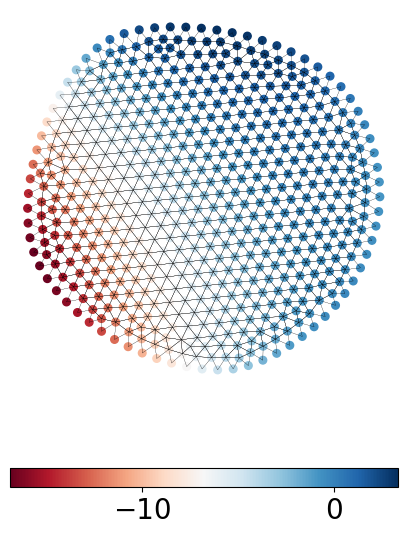

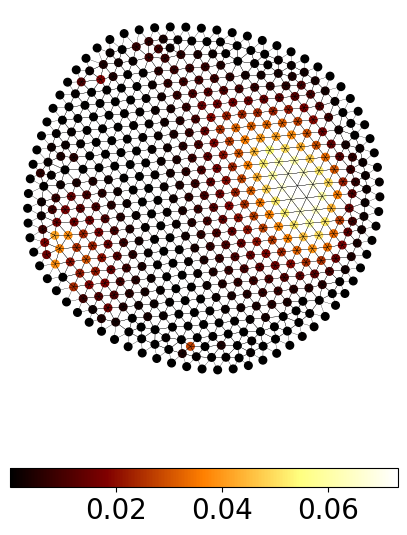

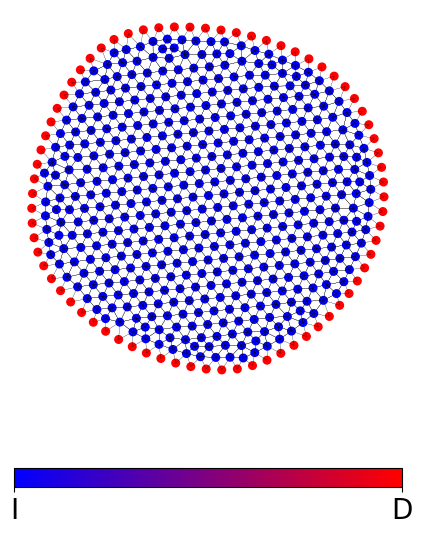

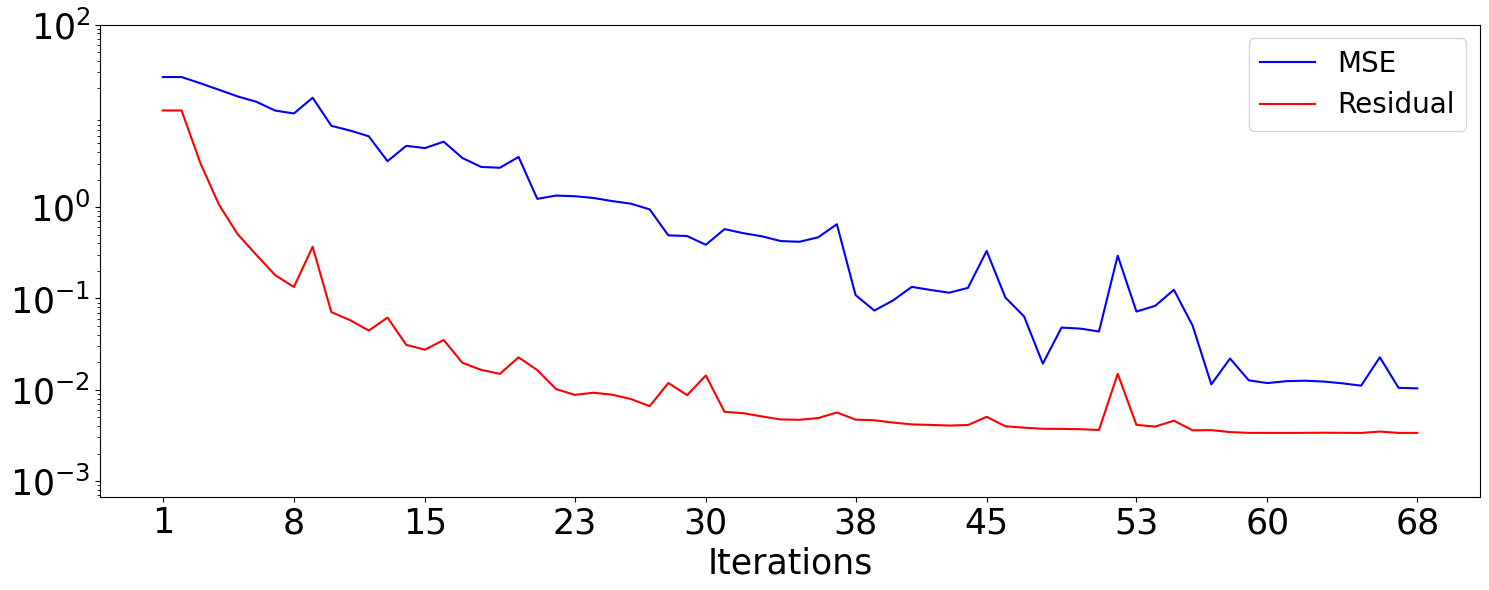

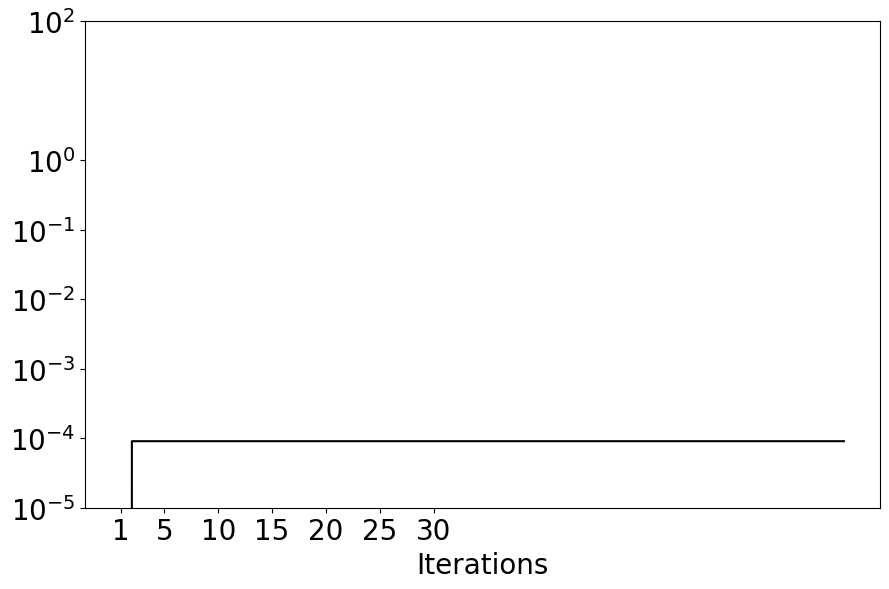

In [16]:
reload(vis)
reload(tst)

tst.solution_sample(ckpt_best_psignn, data, device)